## 第二章 Sklearn包介绍
* http://scikit-learn.org/stable/index.html  (官方英文文档)
* http://sklearn.apachecn.org/cn/stable/index.html  (对应的中文文档)

### 0.Sklearn概述
* sklearn（scikit-learn）是Scipy的扩展，建立在NumPy和matplotlib库的基础上。自2007年发布以来，sklearn已经成为Python重要的机器学习库。
* sklearn支持包括分类、回归、降维和聚类四大机器学习算法。还包含了特征提取、数据处理和模型评估三大模块。
* sklearn内置了大量数据集用于学习和实验使用，节省了获取和整理数据集的时间。
* sklearn拥有着完善的文档，上手容易，具有着丰富的API，利用这几大模块的优势，可以大大提高机器学习的效率。
* 新版本的Sklearn开始逐步支持类型为DataFrame的数据了，最先的版本主要支持类型为Array的数据。


### 1.数据集模块(方便学习练习时使用)
* Sklearn.datasets包含了大量的用于学习的各种数据集，用于学习时方便调用数据即

In [22]:
#Sklearn.datasets包含了大量的用于学习的各种数据集，用于学习时方便调用数据即。
#例子：从数据集中导入鸢尾花数据
from sklearn.datasets import load_iris    #从数据集中导入鸢尾花数据，返回一个类。           
iris_data = load_iris()     #实例构造,iris_data其实是一个字典。
data = iris_data['data']    # 取出特征数据集,是一个array，二维的。
label = iris_data['target']   # 取出标签数据集,是一个array,一维的。

### 2.数据预处理模块Preprocessing
* 此模块主要内容有：标准化、非线性转换、归一化、数值特征二值化、非数值分类特征编码、缺失值插补、生成多项式特征、自定义转换器
* 此模块的处理数据对象一般要求是array,但新的Sklearn开始支持对DataFrame的处理了。

In [2]:
#此模块主要内容有：标准化、非线性转换、归一化、数值特征二值化、非数值分类特征编码、
#缺失值插补、生成多项式特征、自定义转换器.
#例子：对训练数据标准化(即将每一列数据化为均值为0标准差为1的一列数据)
import numpy as np
X_train = np.array([[ 1., -1.,  2.],
                    [ 2.,  0.,  0.],
                    [ 0.,  1., -1.]])
X_test1=np.array([[1.,2.,3.],
                  [2.,3.,5.],
                  [0.,2.,1.]])
X_test2 = np.array([[-1., 1., 0.]])   #假设测试集是一行数据，但也要写成二维array的形式

#--------------------------核心代码---------------------------------------------------
from sklearn.preprocessing import StandardScaler  #导入数据处理模块中的标准化函数
SS = StandardScaler()         #生成实体类模块
scaler=SS.fit(X_train)        #本质上就是求各列均值和方差
X_train=scaler.transform(X_train)     #对数据各列进行标准化
#利用训练集中各列的均值和方差对测试集每一列进行标准化处理。
test1=scaler.transform(X_test1)
test2=scaler.transform(X_test2)

### 3.数据降维模块decomposition

* 模块功能:主成分分析、因子分析、奇异值分解、文本主题模型LDA、非负矩阵分解用来降维。
* 此模块功能还有：独立成分分析用于分离叠加信号
* 线性判别分析LDA也可以降维，但不在这个decomposition模块中。而在discriminant_analysis模块中。

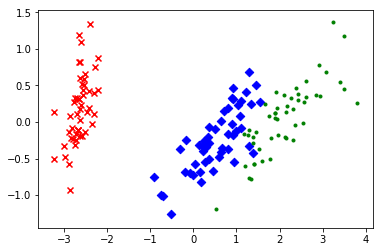

In [39]:
#此模块内容：主成分分析、因子分析、奇异值分解、文本主题模型LDA、非负矩阵分解用来降维。
#此模块内容还有：独立成分分析用于分离叠加信号
#线性判别分析LDA也可以降维，但不在这个decomposition模块中。而在discriminant_analysis模块中。
# 例1：调用主成分分析方法降维
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
data = load_iris()  #导入鸢尾花数据
X = data.data        #生成特征集数据
y = data.target      #生成目标集（标签）数据
#--------------------------核心代码---------------------------------
from sklearn.decomposition import PCA                              
pca = PCA(n_components=2)          #构建PCA实例    
reduced_X = pca.fit_transform(X)   #降维并返回降维后的两列数据
#--------------------------------------------------------------------
#以下是画图
red_x, red_y = [], []
blue_x, blue_y = [], []
green_x, green_y = [], []
for i in range(len(reduced_X)):
    if y[i] == 0:        #第一种鸢尾花
        red_x.append(reduced_X[i][0])
        red_y.append(reduced_X[i][1])
    elif y[i] == 1:     #第二种鸢尾花
        blue_x.append(reduced_X[i][0])
        blue_y.append(reduced_X[i][1])
    else:               #第三种鸢尾花
        green_x.append(reduced_X[i][0])
        green_y.append(reduced_X[i][1])
plt.scatter(red_x, red_y, c='r', marker='x')
plt.scatter(blue_x, blue_y, c='b', marker='D')
plt.scatter(green_x, green_y, c='g', marker='.')
plt.show()

* 关于利用线性判别分析LDA降维的特别说明(此函数不在decomposition模块中)

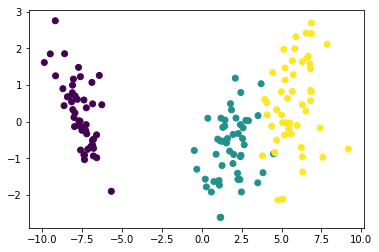

In [48]:
#此函数不在decomposition模块中，而是在discriminant_analysis模块(判别式分析模块)中.
#降维后样本特征和类别信息之间的关系得以保留，对有类别标签的数据降维此方法优于PCA。
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components=2)   #降维二维特征数据
lda.fit(X,y)  ##函数需要类别标签信息
X_new = lda.transform(X)
plt.scatter(X_new[:, 0], X_new[:, 1],marker='o',c=y)
plt.show()

### 4.模型选择和评估模块(model_selection)
* 此模块主要功能：数据劈分、交叉验证、模型评估、验证曲线和学习曲线绘制

In [1]:
#此模块主要功能：数据劈分、交叉验证、模型评估、验证曲线和学习曲线绘制
#例子1：数据劈分为训练集和测试集
from sklearn.datasets import load_iris    #从数据集中导入鸢尾花数据，返回一个类。           
iris_data = load_iris()     #实例构造,iris_data其实是一个字典。
data = iris_data['data']    # 取出特征数据集,是一个array，二维的。
target = iris_data['target']   # 取出标签数据集,是一个array,一维的。

#-------------------------------------核心代码-----------------------------------------
from sklearn.model_selection import train_test_split 
X_train,X_test,y_train,y_test=train_test_split(data,target,test_size=0.25,random_state=1)
#--------------------------------------------------------------------------------------

### 5.数据分析模块
* 数据分析中的大量模块可以实现分类、回归和聚类。

* (1)分类和回归的模块

In [ ]:
#1.分类和回归的模块有：
# 线性模块：linear_model
# 最近邻模块：neighbors
# 贝叶斯模块：naive_bayes
# 判别分析模块：discriminant_analysis
# 树模块：tree
# 方法集成模块：ensemble
# 支持向量机模块：svm
# 神经网络模块：neural_network

* (2)聚类模块

In [ ]:
#2.聚类模块
# 聚类模块：cluster

* (3)特征选择模块

In [ ]:
#3.数据分析中常用的特征选择模块(可以算是预处理模块、也可以算是降维模块)
# 特征选择模块：feature_selection

* (4)模型保存模块

In [3]:
#4.模型保存模块 externals.joblib
#例：将上边训练好的最佳分类器模块decision_tree_classifier保存起来。
'''
from sklearn.externals import joblib
joblib.dump(decision_tree_classifier,'best_classifier.pkl')  #保存模型
clf=jublib.load('best_classifier.pkl')     #调入模型
Ypred=clf.predict(X_test)       #使用调入的模型对数据进行预测
clf.score(Y_test,Ypred)
'''

"\nfrom sklearn.externals import joblib\njoblib.dump(decision_tree_classifier,'best_classifier.pkl')  #保存模型\nclf=jublib.load('best_classifier.pkl')     #调入模型\nYpred=clf.predict(X_test)       #使用调入的模型对数据进行预测\nclf.score(Y_test,Ypred)\n"

### 6.Sklearn包中的模块接口说明

* Sklearn包中的模块有统一的API接口
* 可以使用完全一样的接口来实现不同的机器学习算法，通俗的流程可以理解如下：
* 数据加载和预处理:dataSet = load_iris(),预处理看前边的说明。
* 定义分类器（回归器等等）:svc = svm.svc()
* 用训练集对模型进行训练，只需调用fit方法:svc.fit(X_train, y_train)
* 用训练好的模型进行预测：y_pred=svc.predict(X_test)
* 对模型进行性能评估1：svc.score(X_test, y_test)
* 对模型进行性能评估2：metrics.classification_report(y_test,y_predict) #需要从sklearn中导入metrics子模块。

#### 例子：调用sklearn包进行数据分析(数据可以是array也可以是DataFrame)

In [1]:
#1.读入数据
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 

#此数据文件无列名，因此需要设置header=None，names=['name1','name2','name3','name4']
iris_data = pd.read_csv('iris.data',header=None,names=['sepal_length_cm','sepal_width_cm','petal_length_cm','petal_width_cm','class'])  #这个数据文件人为加了特征名字
#iris_data.head()

data_value=iris_data.drop('class',axis=1)
target_value=iris_data['class']

#生成训练集和验证集
X_train,X_test,y_train,y_test=train_test_split(data_value,target_value,test_size=0.25,random_state=1)

FileNotFoundError: File b'iris.data' does not exist

In [ ]:
#2.训练模型并预测
from sklearn.tree import DecisionTreeClassifier   #导入决策树分类器
from sklearn import metrics
#生成实体分类器
decision_tree_classifier = DecisionTreeClassifier()
decision_tree_classifier.fit(X_train,y_train)  #训练模型

y_predict=decision_tree_classifier.predict(X_test)        #预测新的数据分类,返回类别一维数组
model_accuracy=decision_tree_classifier.score(X_test, y_test)   #测试集的准确率
print('Accuracy of model:',model_accuracy)  